<h1 align=center>Лабораторна робота №1<h1>

<h2>2. ЗАВДАННЯ НА ЛАБОРАТОРНУ РОБОТУ ТА МЕТОДИЧНІ РЕКОМЕНДАЦІЇ ДО ЙОГО ВИКОНАННЯ</h2>
<h3>Завдання 2.1. Попередня обробка даних</h3>
<p>Створимо новий Jupiter Notebook та імпортуймо такі пакети.</p>

In [325]:
import numpy as np
import math
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

<p>Визначимо деяку вибірку даних.</p>

In [326]:
input_data = np.array([[5.1, -2.9, 3.3],
                        [-1.2, 7.8, -6.1],
                        [3.9, 0.4, 2.1],
                        [7.3, -9.9, -4.5]])

<p>Розглянемо декілька різних методів попередньої обробки даних.</p>

<h4>2.1.1. Бінаризація</h4>
<p>Додамо наступні рядки до того ж Jupiter Notebook.</p>

In [327]:
# Бінаризація даних
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\n Binarized data:\n", data_binarized)


 Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


<p>Як бачимо, всі значення понад 1 примусово встановлюються рівними 1. Інші значення стають рівними 0.</p>

<h4>2.1.2 Виключення середнього</h4>
<p>Додамо наступні рядки до нашого Jupiter Notebook, який використовувався в попередньому завданні 2.1.1.</p>

In [328]:
# Виведення середнього значення та стандартного відхилення

print("\nBEFORE: ")
print("Mean = ", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))


BEFORE: 
Mean =  [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]


<p>Ці рядки коду відображають середнє значення і середньоквадратичне відхилення для вхідних даних.</p>
<p>Тепер виключимо середнє значення.</p>

In [329]:
# Виключення середнього значення

data_scaled = preprocessing.scale(input_data)
print("\nAFTER: ")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER: 
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]


<p>Неважко помітити, що середнє значення практично рівне нулю, а стандартне відхилення - одиниці.</p>

<h4>2.1.3. Масштабування</h4>
<p>Додамо до того ж Jupiter Notebook наступні рядки.</p>

In [330]:
#Масштабування MinMax

data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMinMax scaled data:\n", data_scaled_minmax)


MinMax scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


<p>Кожен рядок відмасштабований таким чином, щоб максимальним значенням була б одиниця, а всі решта значень визначалися відносно неї.</p>

<h4>2.1.4. Нормалізація</h4>
<p>Додамо наступні рядки у наш файл.</p>

In [331]:
#Нормалізація даних

data_normalized_l1 = preprocessing.normalize(input_data,norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data,norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


<p>Виконаємо обернену дію та перевіримо алгоритми, що використовуються для нормалізованих даних.</p>

In [332]:
#Перевірка L1-нормалізації
print("L1 normanlization test:\n")
for row in data_normalized_l1:
    print(math.fsum(abs(row)))

#Перевірка L2-нормалізації
print("\nL2 normalization test:\n")
for row in data_normalized_l2:
    print(math.fsum(pow(row,2)))

L1 normanlization test:

0.9999999999999998
1.0
1.0
1.0

L2 normalization test:

0.9999999999999998
1.0
1.0
1.0


<p>Таким чином ми підвердили дію алгоритмів. В методичному варіанті вказано, що L2-нормалізація менш чутлива до викидів, тому бажано використовувати саме цей алгоритм.</p>

<h4>2.1.5. Кодування міток</h4>

<p>Визначимо мітки.</p>

In [333]:
# Надання позначок вхідних даних

input_labels = ['red', 'black', 'green', 'black', 'yellow', 'white']

<p>Створимо обʼєкт кодування міток та навчимо його.</p>

In [334]:
# Створення кодувальника та встановлення відповідності між мітками та числами

encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

LabelEncoder()

<p>Виведемо відображення слів на числа.</p>

In [335]:
# Виведення відображення

print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


<p>Перетворимо набір випадково впорядкованих міток, щоб перевірити роботу кодувальника.</p>

In [337]:
# Перетворення міток за допомогою кодувальника

test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))


Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]


<p>Декодуємо випадковий набір чисел.</p>

In [338]:
# Декодування набору чисел за допомогою декодера
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list(decoded_list))


Encoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


<p>Таким чином отримали практичні навички з кодування та декодування міток за допомогою пакету preprocessing.</p>

<h3>Завдання 2.2. Попередня обробка нових даних</h3>

<p>Варіант №16</p>
<table>
    <tr>
        <th align=center>№ варіанту</th>
        <th align=center, colspan="12">Значення змінної input_data</th>
        <th align=center>Поріг бінаризації</th>
    </tr>
    <tr>
        <td align=center>16.</td>
        <td align=center>-3.3</td>
        <td align=center>-1.6</td>
        <td align=center>6.1</td>
        <td align=center>-2.4</td>
        <td align=center>-1.2</td>
        <td align=center>4.3</td>
        <td align=center>-3.2</td>
        <td align=center>5.5</td>
        <td align=center>-6.1</td>
        <td align=center>-4.4</td>
        <td align=center>1.4</td>
        <td align=center>-1.2</td>
        <td align=center>2.1</td>
    </tr>
</table>

Бінарізації, Виключення середнього, Масштабування, Нормалізації.

<p>Вхідні дані:</p>

In [339]:
input_data = np.array([[-3.3, -1.6, 6.1],
                    [-2.4, -1.2, 4.3],
                    [-3.2, 5.5, -6.1],
                    [-4.4, 1.4, -1.2]])

<p>Бінаризація даних</p>

In [340]:
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("Binarized data: \n", data_binarized)

Binarized data: 
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]


<p>Виключення середнього</p>

In [341]:
print("BEFORE:")
print("Mean = ", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))

BEFORE:
Mean =  [-3.325  1.025  0.775]
Std deviation = [0.71195154 2.82875856 4.79446295]


<p>Тепер виключимо середнє значення</p>

In [342]:
data_scaled = preprocessing.scale(input_data)
print("AFTER:")
print("Mean =", (data_scaled.mean(axis=0)))
print("Std deviatuion =", data_scaled.std(axis=0))

AFTER:
Mean = [-4.44089210e-16 -5.55111512e-17  6.93889390e-17]
Std deviatuion = [1. 1. 1.]


<p>Неважко помітити, що середнє значення практично рівне 0, а стандартне відхилення - 1.</p>

<p>Масштабування</p>

In [343]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("Min max scaled data:\n", data_scaled_minmax)

Min max scaled data:
 [[0.55       0.         1.        ]
 [1.         0.05633803 0.85245902]
 [0.6        1.         0.        ]
 [0.         0.42253521 0.40163934]]


<p>Кожен рядок відформатовано таким чином, щоб максимальним значенням була б одиниця, а всі решта значень визначалися відносно неї.</p>

<p>Нормалізація</p>

In [344]:
data_normalized_l1 = preprocessing.normalize(input_data,norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data,norm='l2')
print("L1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)

L1 normalized data:
 [[-0.3        -0.14545455  0.55454545]
 [-0.30379747 -0.15189873  0.5443038 ]
 [-0.21621622  0.37162162 -0.41216216]
 [-0.62857143  0.2        -0.17142857]]

L2 normalized data:
 [[-0.46364048 -0.22479538  0.8570324 ]
 [-0.47351004 -0.23675502  0.84837215]
 [-0.36302745  0.62395344 -0.69202108]
 [-0.92228798  0.29345527 -0.25153308]]


<h3>Завдання 2.3. Класифікація логістичною регресією або логістичний класифікатор</h3>

<p>Визначимо зразок вхідних даних за допомогою двовимірних векторів і відповідних міток.</p>

In [345]:
# Визначення зразка вхідних даних
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5],
            [6, 5], [5.6, 5], [3.3, 0.4], 
            [3.9, 0.9], [2.8, 1],
            [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

<p>Натренуємо класифікатор, використовуючи ці позначені дані. Створимо обʼєкт логістичного класифікатора.</p>

In [346]:
# Створення логістичного класифікатора

classifier = linear_model.LogisticRegression(solver='liblinear',C=1)

<p>Навчимо класифікатор, використовуючи певні дані.</p>

In [347]:
# Тренування класифікатора

classifier.fit(X, y)

LogisticRegression(C=1, solver='liblinear')

<p>Візуалізувати результати роботи не вдалося, через застарілу бібліотеку, що вказана в методичних матеріалах.</p>

<h3>Завдання 2.4. Класифікація наївним байєсовським класифікатором</h3>

<p>Як джерело даних буде використано файл data_multivar_nb.txt, кожен рядок якого містить значення розділені комою.</p>

In [348]:
# Вхідний файл, який містить дані
input_file = 'data_multivar_nb.txt'

<p>Завантажимо дані із цього файлу.</p>

In [349]:
# Завантаження даних із вхідного файлу
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

<p>Створимо екземпляр наївного байєсовського класифікатора. У даному випадку ми будемо використовувати гаусівський наївний байєсівський класифікатор, в якому передбачається, що значення, які асоціюються з кожним класом, дотримуються закону розподілу Гауса.</p>

In [350]:
# Створення наївного байєсовського класифікатора
classifier = GaussianNB()

<p>Навчимо класифікатор, використовуючи тренувальні дані.</p>

In [351]:
# Тренування класифікатора
classifier.fit(X, y)

GaussianNB()

<p>Запустимо класифікатор на тренувальних даних та спрогнозуємо результати.</p>

In [352]:
# Прогнозування значень для тренувальних даних
y_pred = classifier.predict(X)

<p>Обчислимо якість (accuracy)1 класифікатора, порівнявши передбачені значення з істинними мітками.</p>

In [353]:
# Обчислення якості класифікатора
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy,2), "%")

Accuracy of Naive Bayes classifier = 99.75 %


<p>Розіб'ємо дані на навчальний та тестовий набори. Відповідно до значення параметра test_size, зазначеного в рядку коду нижче, ми віднесемо 80% даних до тренування, а 20% - до тестування. Потім ми виконаємо тренування наївним байєсовським класифікатором на цих даних.</p>

In [354]:
# Розбивка даних на навчальний та тестовий набори

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

<p>Обчислимо якість класифікатора.</p>

In [355]:
# Обчислення якості класифікатора
accuracy = 100.0 * (y_test == y_test_pred).sum()/X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2),"%")

Accuracy of the new classifier = 100.0 %


<p>Скористаємося вбудованими функціями для обчислення якості (accuracy), точності (precision) 2 та повноти (recall) 3 класифікатора на підставі потрійний перехрестної перевірки.</p>

In [356]:
num_folds = 3
accuracy_values = cross_val_score(classifier,X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2))+ "%")
precision_values = cross_val_score(classifier,X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100 * precision_values.mean(),2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier,X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100 * f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


<h3>Завдання 2.5. Вивчити метрики якості класифікації</h3>

<p>Завантажимо зразок набору даних, який має фактичні мітки (actual_lable) та ймовірності прогнозування для двох моделей (model_RF та model_LR). Тут ймовірність - це можливість бути 1-м класом.</p>

In [357]:
import pandas as pd
df = pd.read_csv('data_metrics.csv')
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


<p>Припустимо, що поріг буде рівний 0.5 і додамо два додаткові стовпці, які перетворять ймовірності на передбачені мітки.</p>

In [358]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


<h4>Матриця помилок (confusion_matrix)</h4>

<p>Отримаємо матрицю помилок (2х2) на основі наших вхідних даних.</p>

In [359]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

<p>Перевіримо confusion_matrix за допомогою власних функцій.</p>

In [360]:
def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))# your code here
def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))# your code here
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))# your code here

<p>Перевіримо наші результати на відповідність.</p>

In [361]:
print('TP:',find_TP(df.actual_label.values, df.predicted_RF.values))
print('FN:',find_FN(df.actual_label.values, df.predicted_RF.values))
print('FP:',find_FP(df.actual_label.values, df.predicted_RF.values))
print('TN:',find_TN(df.actual_label.values, df.predicted_RF.values))

TP: 5047
FN: 2832
FP: 2360
TN: 5519


<p>Напишемо функцію, яка обчислить всі чотири сегменти для нас та іншу функцію для дублювання confusion_matrix.</p>

In [362]:
import numpy as np
def find_conf_matrix_values(y_true,y_pred):
    # calculate TP, FN, FP, TN
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN
def mykolaichuk_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

<p>Перевіримо відповідність результатів з </p>

In [363]:
mykolaichuk_confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

<p>Замість того, щоб порівнювати вручну, перевіримо, що наші функції працюють, використовуючи стандарту функцію Python <i>assert</i> і функцію <i>array_equal</i> бібліотеки numpy.</p>

In [364]:
assert np.array_equal(mykolaichuk_confusion_matrix(df.actual_label.values, df.predicted_RF.values),confusion_matrix(df.actual_label.values, df.predicted_RF.values) ), 'my_confusion_matrix() is not correct for RF'
assert np.array_equal(mykolaichuk_confusion_matrix(df.actual_label.values, df.predicted_LR.values),confusion_matrix(df.actual_label.values, df.predicted_LR.values) ), 'my_confusion_matrix() is not correct for LR'

<p>Маючи ці чотири сегменти (TP, FP, FN, TN), ми можемо обчислити багато інших показників продуктивності.
<br><br>
<b>accuracy_score</b>
<br><br>
Найбільш поширеним показником для класифікації є акуратність, тобто частка вибірок, що правильно спрогнозовані, як показано нижче:</p>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*N4Lo9Miw397g3XpX7o0CDw.png" alt="">
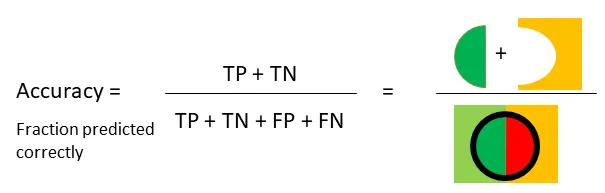

<p>Ми можемо отримати оцінку точності з scikit-learn, яка приймає як вхідні дані фактичні мітки та прогнозовані мітки.</p>

In [365]:
from sklearn.metrics import accuracy_score
accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

<p>Визначимо свою власну функцію, яка дублює <i>accuracy_score</i>, використовуючи формулу вище.</p>

In [366]:
def mykolaichuk_accuracy_score(y_true, y_pred):
    # calculates the fraction of samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return (TP + TN)/(TP + FN + FP + TN)
assert mykolaichuk_accuracy_score(df.actual_label.values, df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'mykolaichuk_accuracy_score failed on RF'
assert mykolaichuk_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'mykolaichuk_accuracy_score failed on LR'
print('Accuracy RF: %.3f'%(mykolaichuk_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Accuracy LR: %.3f'%(mykolaichuk_accuracy_score(df.actual_label.values, df.predicted_LR.values)))

Accuracy RF: 0.671
Accuracy LR: 0.616


<p>Оскільки акуратність не завжди може задовільняти наші задачі, спробуємо порахувати наступний показник, як чутливість (<b>recall_score</b>)
<br><br>
<b>recall_score</b> є частка позитивних подій, які було правильно передбачено.</b>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*nCMqH8BnHgsaxY6mcP6cAQ.png" alt="">
<br><br>
Отримаємо оцінку точності з scikit-learn, яка приймає як вхідні дані фактичні мітки та прогнозовані мітки.
</p>

In [367]:
from sklearn.metrics import recall_score
recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

<p>Визначимо власну функцію, яка дублює recall_score, використовуючи формулу вище.</p>

In [368]:
def mykolaichuk_recall_score(y_true, y_pred):
    # calculates the fraction of positive samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return TP/(TP+FN)
assert mykolaichuk_recall_score(df.actual_label.values, df.predicted_RF.values) == recall_score(df.actual_label.values, df.predicted_RF.values), 'mykolaichuk_accuracy_score failed on RF'
assert mykolaichuk_recall_score(df.actual_label.values, df.predicted_LR.values) == recall_score(df.actual_label.values, df.predicted_LR.values), 'mykolaichuk_accuracy_score failed on LR'
print('Recall RF: %.3f'%(mykolaichuk_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall LR: %.3f'%(mykolaichuk_recall_score(df.actual_label.values, df.predicted_LR.values)))

Recall RF: 0.641
Recall LR: 0.543


<p>Один із способів підвищити повноту – збільшити кількість вибірок, які ви визначаєте як прогнозовані позитивні, шляхом зниження порога для прогнозованих позитивних результатів. На жаль, це також збільшить кількість хибних спрацьовувань. Інший показник продуктивності, названий точністю, враховує це.
<br><br>
<b>precision_score</b>
<br><br>
Точність - це частка очікуваних позитивних подій, які є позитивними, як показано нижче:<br>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*M7LtRth4_A4Hwa_lgRDeIg.png" alt="">
<br><br>
Визначимо оцінку точності з scikit-learn, яка приймає як вхідні дані фактичні мітки та прогнозовані мітки.
</p>

In [369]:
from sklearn.metrics import precision_score
precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

<p>Визначимо власну функцію, яка дублює precision_score, використовуючи формулу вище.</p>

In [370]:
def mykolaichuk_precision_score(y_true, y_pred):
    # calculates the fraction of predicted positives samples that are actually positive
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return TP/(TP+FP)
assert mykolaichuk_precision_score(df.actual_label.values, df.predicted_RF.values) == precision_score(df.actual_label.values, df.predicted_RF.values), 'mykolaichuk_accuracy_score failed on RF'
assert mykolaichuk_precision_score(df.actual_label.values, df.predicted_LR.values) == precision_score(df.actual_label.values, df.predicted_LR.values), 'mykolaichuk_accuracy_score failed on LR'
print('Precision RF: %.3f'%(mykolaichuk_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision LR: %.3f'%(mykolaichuk_precision_score(df.actual_label.values, df.predicted_LR.values)))

Precision RF: 0.681
Precision LR: 0.636


<p>В цьому випадку, схоже, що RF модель краще як за повнотою, так і по точності. Але що б ви зробили, якби одна модель краща за повнотою, а інша була точнішою. Один метод, який використовують у цьому випадку, називають рахунком F1.
<br><br>
<b>f1_score</b>
<br><br>
Оцінка f1 є гармонійним середнім значенням повноти та точності, з більш високою оцінкою як краща модель. Оцінка f1 розраховується за такою формулою:
<br><br>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*WaXly05rd5MIWLE5QI3cvg.png" alt="">
<br><br>
Визначимо оцінку f1 з scikit-learn, яка приймає як вхідні дані фактичні мітки та прогнозовані мітки.
</p>

In [371]:
from sklearn.metrics import f1_score
f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

<p>Визначимо власну функцію, яка дублює f1_score, використовуючи формулу вище.</p>

In [372]:
def mykolaichuk_f1_score(y_true, y_pred):
    # calculates the F1 score
    recall = mykolaichuk_recall_score(y_true,y_pred)  
    precision = mykolaichuk_precision_score(y_true,y_pred)  
    return 2* (precision * recall)/(precision+recall)
assert mykolaichuk_f1_score(df.actual_label.values, df.predicted_RF.values) == f1_score(df.actual_label.values, df.predicted_RF.values), 'mykolaichuk_accuracy_score failed on RF'
assert mykolaichuk_f1_score(df.actual_label.values, df.predicted_LR.values) == f1_score(df.actual_label.values, df.predicted_LR.values), 'mykolaichuk_accuracy_score failed on LR'
print('F1 RF: %.3f'%(mykolaichuk_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 LR: %.3f'%(mykolaichuk_f1_score(df.actual_label.values, df.predicted_LR.values)))

F1 RF: 0.660
F1 LR: 0.586


<p>До цих пір ми припускали, що ми визначили поріг 0,5 для вибору зразків, які прогнозуються як позитивні. Якщо ми змінимо цей поріг, показники продуктивності зміняться. Як показано нижче:</p>

In [373]:
print('scores with threshold = 0.5')
print('Accuracy RF: %.3f'%(mykolaichuk_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF: %.3f'%(mykolaichuk_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF: %.3f'%(mykolaichuk_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(mykolaichuk_f1_score(df.actual_label.values, df.predicted_RF.values)))
print(' ')
print('scores with threshold = 0.25')
print('Accuracy RF: %.3f'%(mykolaichuk_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(mykolaichuk_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(mykolaichuk_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('F1 RF: %.3f'%(mykolaichuk_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))

scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660
 
scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


<p>Моделі Accuracy, Precision точніші з вищим порогом (0.5), а моделі Recall, F1 точніші з нижчим порогом (0.25).
<br><br>
Як же оцінювати модель, якщо ми не вибрали поріг? Одним із найпоширеніших методів є використання кривої робочих характеристик приймача (ROC).
<br><br>
<b>roc_curve</b> та <b>roc_auc_score</b>
<br><br>
Криві ROC ДУЖЕ допомагають зрозуміти баланс між істинно позитивними показниками та хибнопозитивними показниками. Sci-kit learn має вбудовані функції для кривих ROC та їх аналізу. Входи в ці функції (roc_curveа також roc_auc_score) фактичні мітки та прогнозовані ймовірності (не прогнозовані мітки). І та й інша roc_curve, а також roc_auc_score обидві складні функції, тому ми не будемо писати ці функції з нуля. Натомість ми покажемо, як використовувати функції Sci-Kit Learn і пояснимо ключові моменти. Давайте почнемо з використання roc_curve.
</p>

In [374]:
from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

<p>Функція roc_curve повертає три списки:
<ul>
    <li>пороги = всі унікальні ймовірності передбачення в порядку спадання</li>
    <li>fpr = хибнопозитивний показник (FP/(FP+TN)) для кожного порогу</li>
    <li>tpr = істинно позитивна швидкість (TP/(TP+FN)) для кожного порогу.</li>
</ul>
<br><br>
Побудуємо риву ROC для кожної моделі, як показано нижче.
</p>

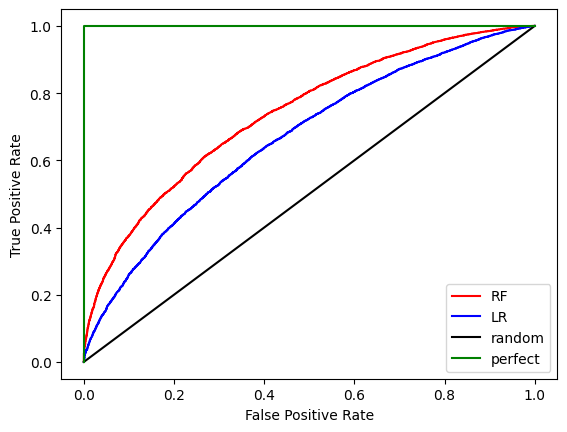

In [375]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<p>Є кілька речей, які ми можемо спостерігати із цієї фігури:
<ul>
    <li>модель, яка випадково вгадує мітку, призведе до чорної лінії, і нам
        необхідно мати модель із кривою над цією чорною лінією.</li>
    <li>ROC- крива, якя знаходиться далі від чорної лінії, краще, тому RF
        (червона) виглядає краще, ніж LR (синя)</li>
    <li>Хоча це не видно безпосередньо, високий поріг призводить до точки
        у лівому нижньому кутку, а низький поріг призводить до точки у верхньому правому куті. Це означає, що, зменшуючи поріг, ви отримуєте вищий TPR за рахунок вищого FPR.</li>
</ul>
<br><br>
Для аналізу продуктивності ми використовуватимемо метрику площі під кривою.
</p>

In [376]:
from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


<p>Як ви зможете побачити, площа під кривою для моделі RF (AUC = 0,738) краще, ніж LR (AUC = 0,666). Коли будуєте криву ROC, доцільно додавати AUC до легенди, як показано нижче.</p>

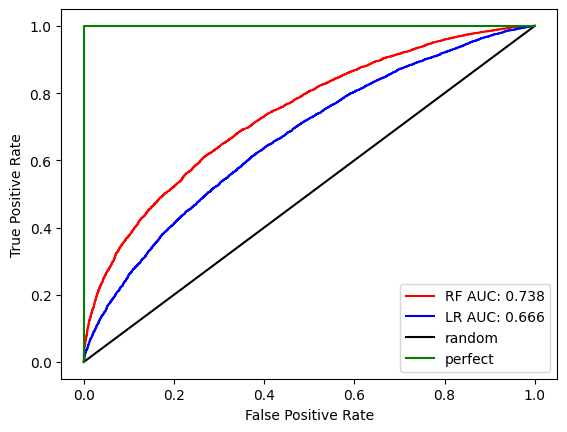

In [377]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<h2>Завдання 2.6. Розробіть програму класифікації даних в файлі data_multivar_nb.txt за допомогою машини опорних векторів (Support Vector Machine - SVМ). Розрахуйте показники якості класифікації. Порівняйте їх з показниками наївного байєсівського класифікатора. Зробіть висновки яку модель класифікації краще обрати і чому.
</h2>

In [388]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data from file
with open('data_multivar_nb.txt') as file:
    data = []
    for line in file:
        row = line.split(',')
        data.append([float(row[0]), float(row[1]), int(row[2])])

# separate data into features (X) and labels (y)
X = []
y = []
for row in data:
    X.append(row[:2])
    y.append(row[2])

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train support vector machine classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# predict labels for testing set
y_pred = clf.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# print accuracy score as percentage
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.75%
